In [1]:
# Early WIP

In [2]:
# V 1.13
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

# Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [10]:
# Additional imports
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [11]:
df = pd.read_csv(ZipFile('data/partynyc.zip').open('bar_locations.csv'))
df.head(3)

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,"10,308.00",STATEN ISLAND,STATEN ISLAND,40.54,-74.14,40
1,Club/Bar/Restaurant,"10,012.00",NEW YORK,MANHATTAN,40.73,-74.00,18
2,Club/Bar/Restaurant,"10,308.00",STATEN ISLAND,STATEN ISLAND,40.54,-74.14,21


In [12]:
df.shape

(2440, 7)

In [13]:
df.columns

Index(['Location Type', 'Incident Zip', 'City', 'Borough', 'Latitude',
       'Longitude', 'num_calls'],
      dtype='object')

In [14]:
new_columns = ['LocationType', 'IncidentZip', 'City', 'Borough', 'Latitude',
       'Longitude', 'NumCalls']
df.columns = new_columns

In [15]:
df.head(1)

,LocationType,IncidentZip,City,Borough,Latitude,Longitude,NumCalls
0,Club/Bar/Restaurant,"10,308.00",STATEN ISLAND,STATEN ISLAND,40.54,-74.14,40


In [17]:
df.LocationType.unique()

array(['Club/Bar/Restaurant'], dtype=object)

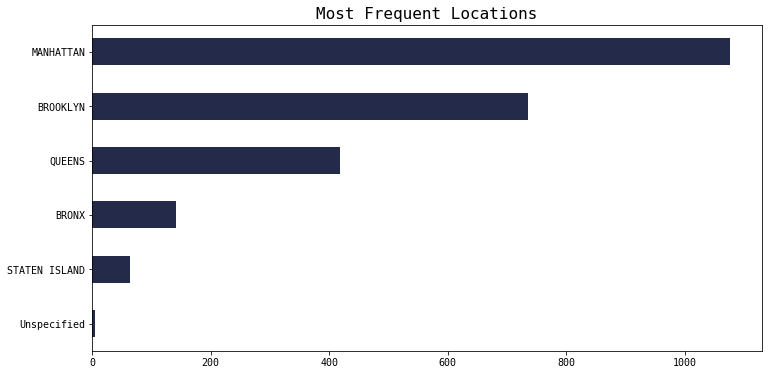

In [23]:
df.Borough.value_counts(ascending=True).plot(kind='barh', color=MC);
plt.title('Most Frequent Locations');

In [27]:
pubs_map = folium.Map(location=[40.742459, -73.971765], zoom_start=12)
data = [[x[0], x[1], 1] for x in np.array(df[['Latitude', 'Longitude']])]
HeatMap(data, radius=20).add_to(pubs_map)
pubs_map